In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

In [75]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/daily-min-temperatures.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [76]:
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [77]:
ts1 = df['Temp']  # 우선은 데이터 확인용이니 time series 의 이니셜을 따서 'ts'라고 이름 붙여줍시다!
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

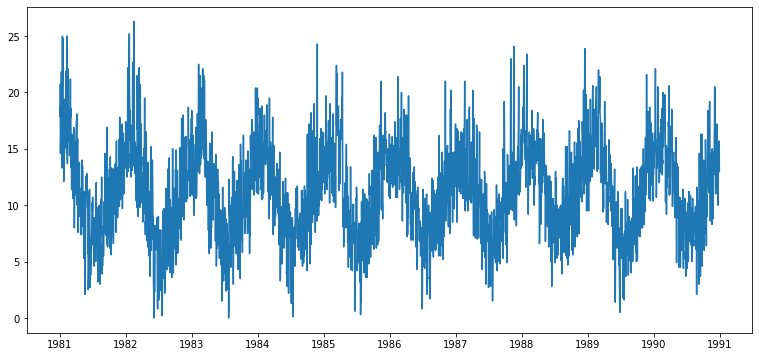

In [78]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

In [79]:
ts1[ts1.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Temp, dtype: float64)

Series([], Name: Temp, dtype: float64)


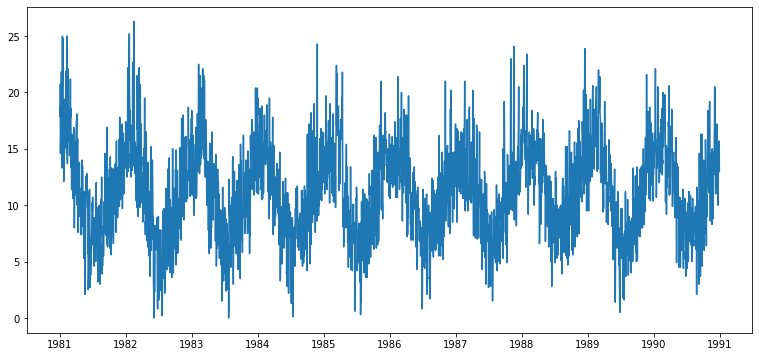

In [80]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts1=ts1.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인합니다.
print(ts1[ts1.isna()])

# 다시 그래프를 확인해봅시다!
plt.plot(ts1)

In [8]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

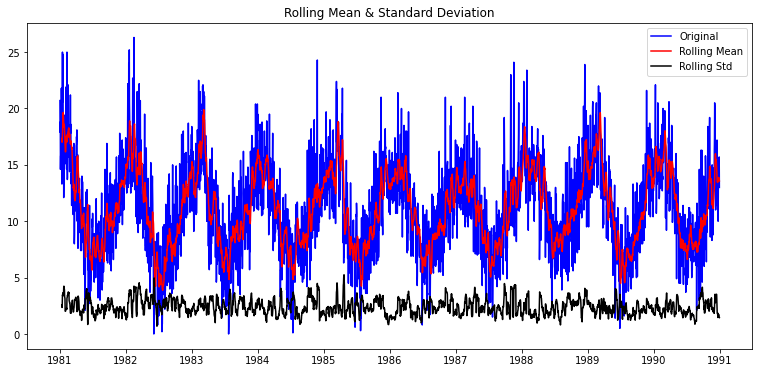

In [9]:
plot_rolling_statistics(ts1, window=12)

In [81]:
dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/airline-passengers.csv' 
df = pd.read_csv(dataset_filepath, index_col='Month', parse_dates=True).fillna(0)  
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


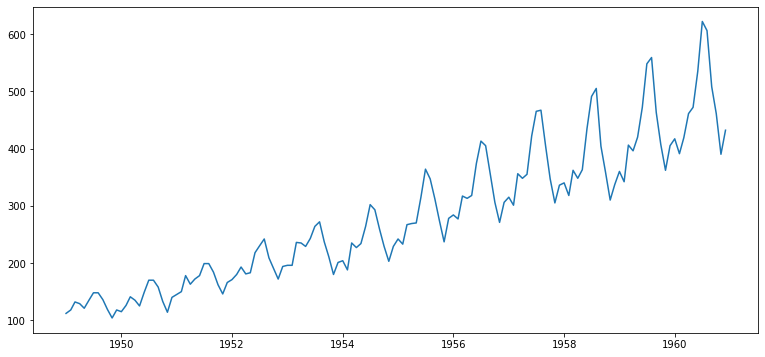

In [82]:
ts2 = df['Passengers']
plt.plot(ts2)

In [83]:
ts2.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

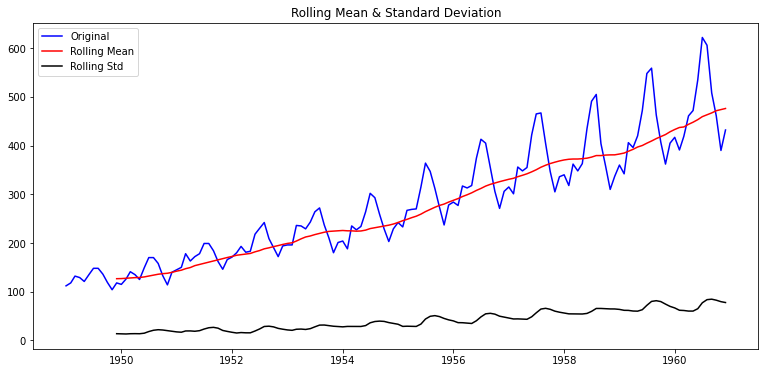

In [12]:
plot_rolling_statistics(ts2, window=12)

In [13]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [14]:
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                   -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64


In [15]:
augmented_dickey_fuller_test(ts2)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


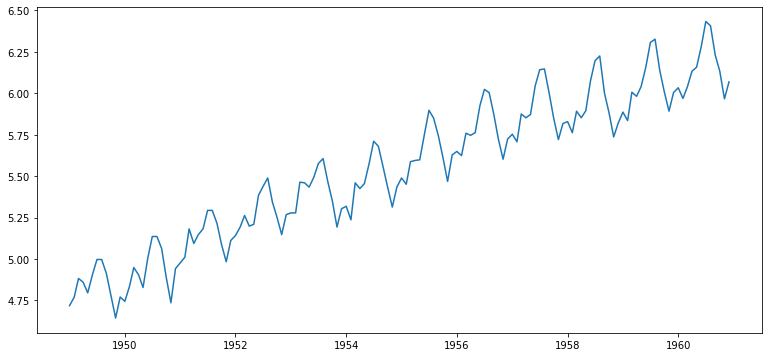

In [16]:
ts_log = np.log(ts2)
plt.plot(ts_log)

In [17]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


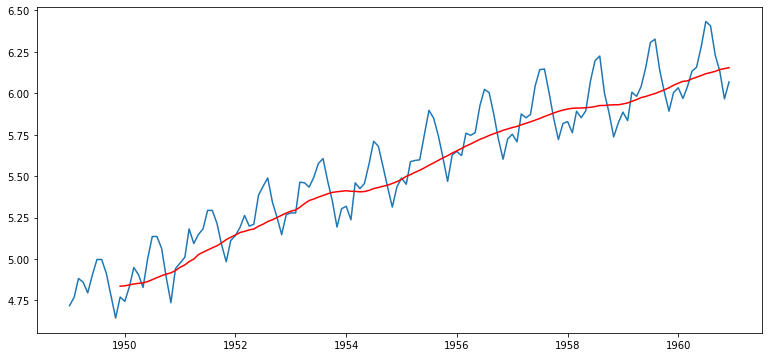

In [18]:
moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [19]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

In [20]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
1950-12-01    0.010818
1951-01-01    0.026593
1951-02-01    0.045965
Name: Passengers, dtype: float64

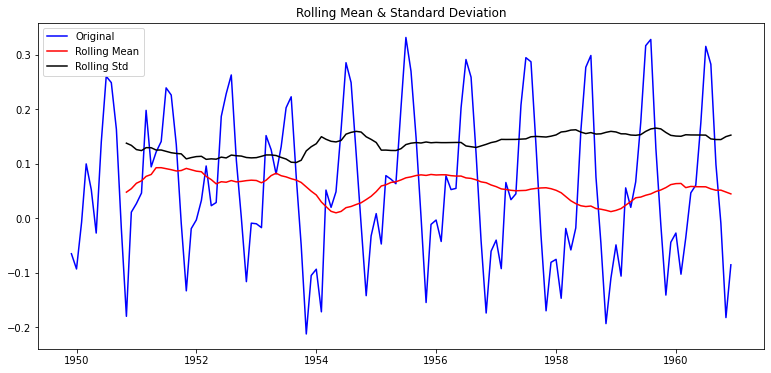

In [21]:
plot_rolling_statistics(ts_log_moving_avg)

In [22]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [23]:
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)

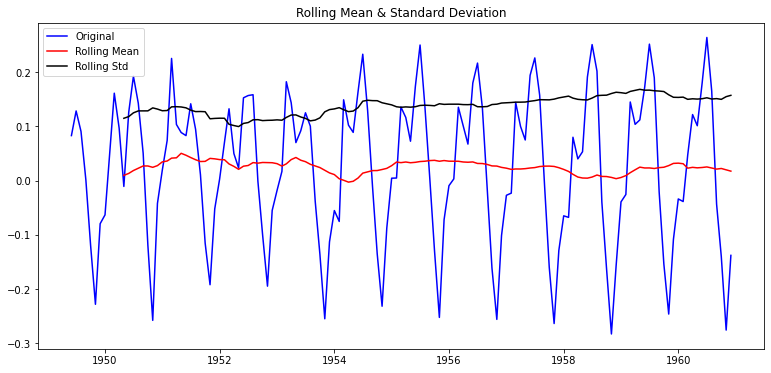

In [24]:
plot_rolling_statistics(ts_log_moving_avg_6)

In [25]:
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                  -2.273822
p-value                          0.180550
#Lags Used                      14.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


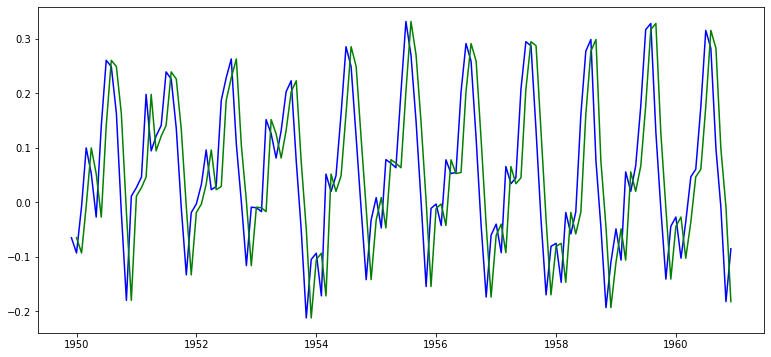

In [26]:
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

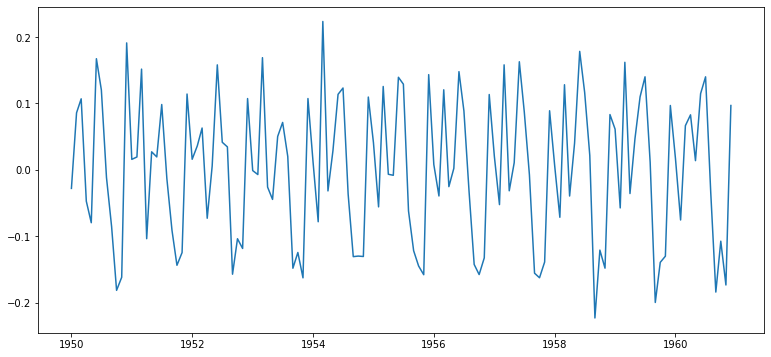

In [27]:
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

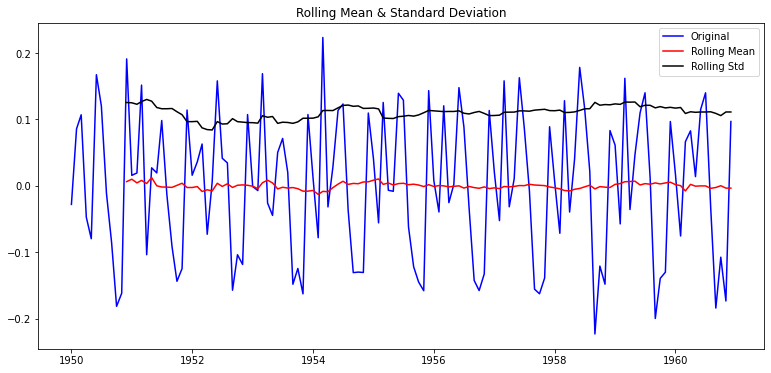

In [28]:
plot_rolling_statistics(ts_log_moving_avg_diff)

In [29]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.912981
p-value                          0.001941
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


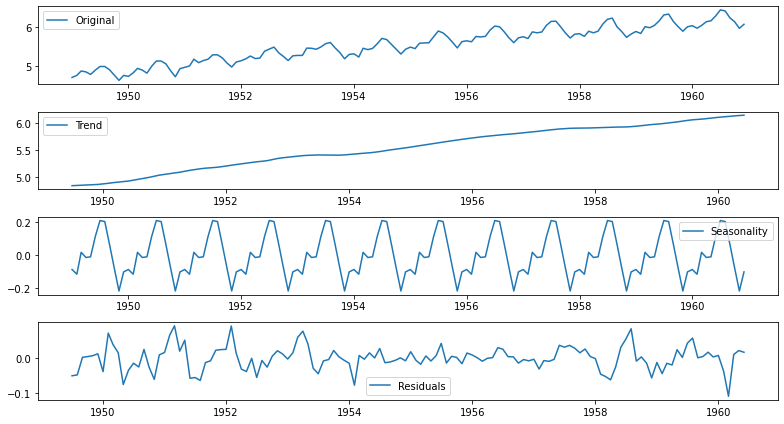

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

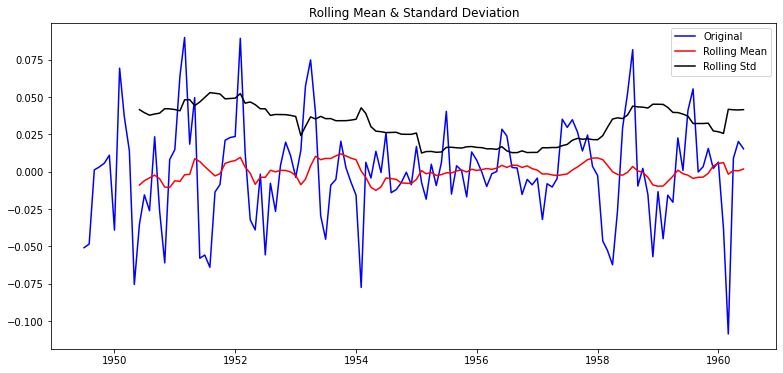

In [31]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [32]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


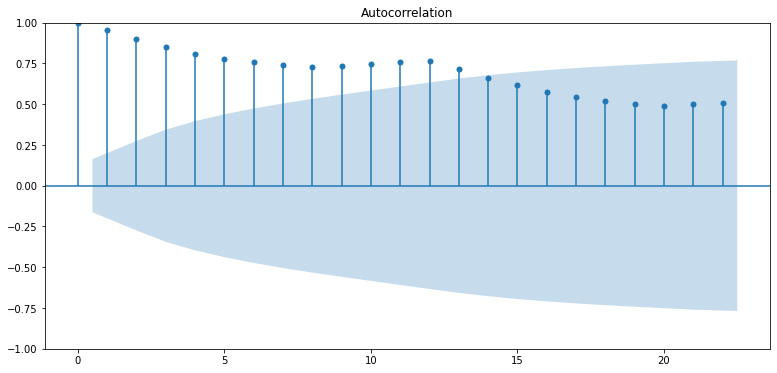

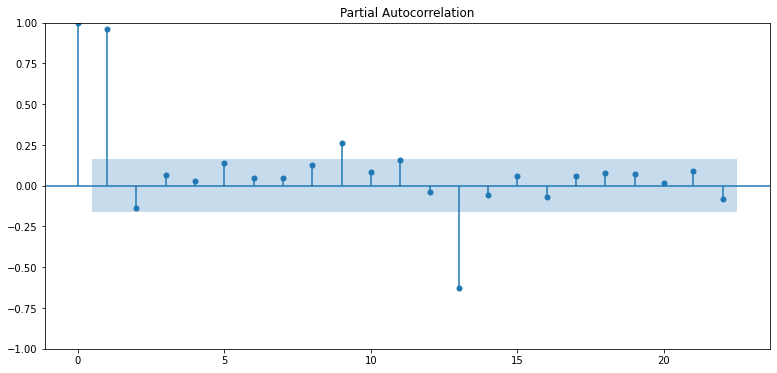

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


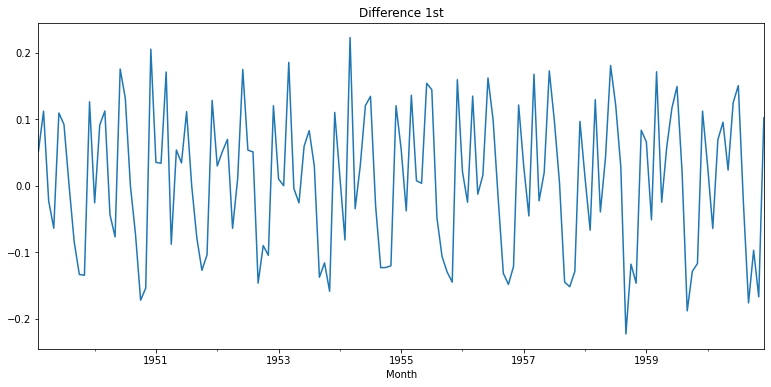

In [34]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.196629e+00
p-value                        7.419305e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


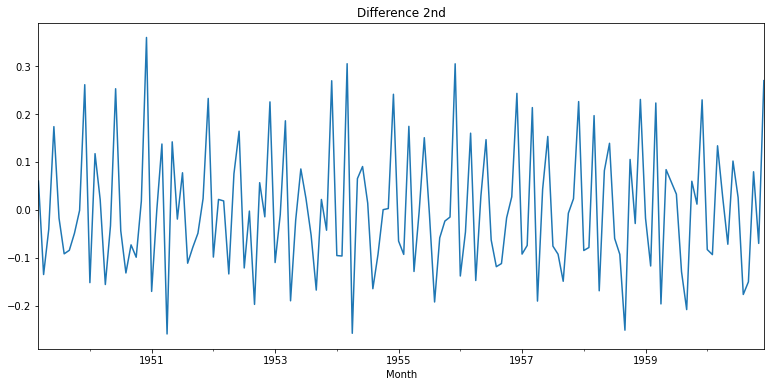

In [35]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

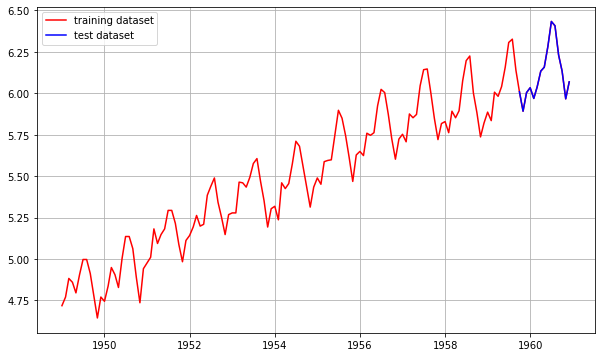

In [36]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [37]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Month
1949-01-01    4.718499
1949-02-01    4.770685
Name: Passengers, dtype: float64
(129,)
(15,)


In [38]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(14, 1, 0)) # 모수는 이전 그래프를 참고 
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  129
Model:                ARIMA(14, 1, 0)   Log Likelihood                 219.951
Date:                Thu, 10 Feb 2022   AIC                           -409.902
Time:                        03:50:58   BIC                           -367.121
Sample:                    01-01-1949   HQIC                          -392.520
                         - 09-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2752      0.081     -3.387      0.001      -0.434      -0.116
ar.L2         -0.0124      0.109     -0.114      0.909      -0.225       0.200
ar.L3          0.0002      0.046      0.005      0.9

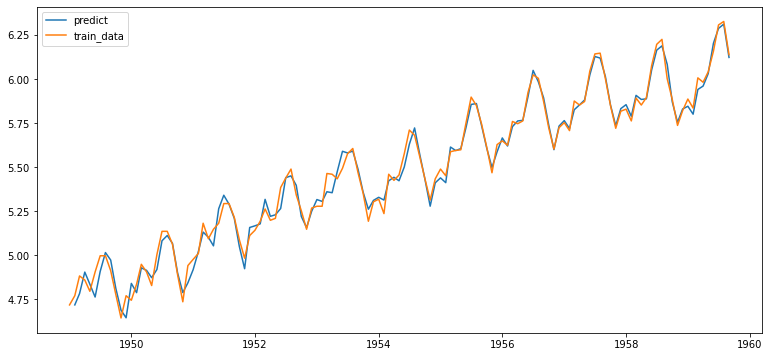

In [39]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

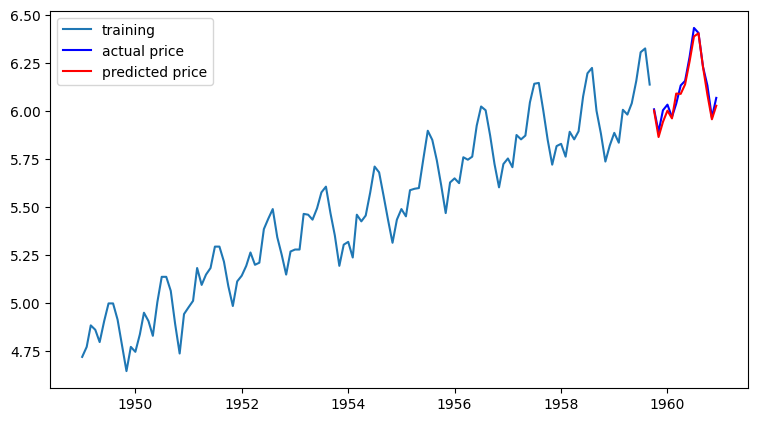

In [40]:
model = ARIMA(train_data, order=(14, 1, 0))  # p값을 14으로 테스트
fitted_m = model.fit() 
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  231.97320956929948
MAE:  12.424959605677085
RMSE:  15.230666747365314
MAPE: 2.74%


## 여기부터 실습
### Step1) 시계열 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#### 1번 데이터 : 제공된 주식

In [2]:
dataset_filepath1 = os.getenv('HOME')+'/aiffel/stock_prediction/data/005930.KS.csv' 
df1 = pd.read_csv(dataset_filepath1, index_col='Date', parse_dates=True)
print(type(df1))
df1.head()

<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-18,47950.0,49100.0,47600.0,48800.0,46788.835938,20481981
2020-05-19,50100.0,50500.0,49700.0,50300.0,48227.015625,25168295
2020-05-20,50000.0,50200.0,49800.0,50000.0,47939.382813,14896899
2020-05-21,50300.0,50400.0,49850.0,49950.0,47891.437500,14949266
2020-05-22,49600.0,49800.0,48600.0,48750.0,46740.894531,19706284


In [3]:
ts1 = df1['Close']

In [4]:
ts1.head()

Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

#### 2번 데이터 : 비트코인  (출처 https://www.blockchain.com/ko/charts/market-price?timespan=60days)

In [5]:
dataset_filepath2 = os.getenv('HOME')+'/aiffel/stock_prediction/data/bitcoin.csv' 
df2 = pd.read_csv(dataset_filepath2, index_col='Timestamp', parse_dates=True)
df2.head()

,market-price
Timestamp,
2021-02-17,49160.10
2021-02-18,52118.23
2021-02-19,51608.15
2021-02-20,55916.50
2021-02-21,56001.20


In [6]:
ts2 = df2['market-price']
ts2.head()

Timestamp
2021-02-17    49160.10
2021-02-18    52118.23
2021-02-19    51608.15
2021-02-20    55916.50
2021-02-21    56001.20
Name: market-price, dtype: float64

#### 3번 데이터 : 농산물(양파) 가격(출처 https://dacon.io/competitions/official/235801/data)

In [7]:
dataset_filepath3 = os.getenv('HOME')+'/aiffel/stock_prediction/data/farm_product.csv' 
df3 = pd.read_csv(dataset_filepath3, index_col='date', parse_dates=True) 
df3.head()

,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,금요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-02,토요일,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,15019.0,...,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2016-01-03,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-04,월요일,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,141638.0,...,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
2016-01-05,화요일,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,126207.8,...,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0


In [8]:
ts3 = df3['양파_가격(원/kg)']
ts3.head()

date
2016-01-01       0.0
2016-01-02    1281.0
2016-01-03       0.0
2016-01-04    1235.0
2016-01-05    1213.0
Name: 양파_가격(원/kg), dtype: float64

### Step2) 각종 전처리 수행
#### 2-1) 결측치 확인

In [9]:
print(ts1.isnull().sum())
print(ts2.isnull().sum())
print(ts3.isnull().sum())

0
0
0


3번 데이터의 경우 매매가 없는 휴일(일요일, 공휴일 등)은 0 값을 가지는 것을 알 수 있지만, NaN으로 나타나지 않아 결측치가 없는것으로 나타난다. 공식적으로 '거래가 일어나지 않아서' 0원으로 찍히는거지 실제 가격과는 차이가 나는 것이므로, 찾아서 삭제해야 할 것 같다. 시간데이터가 왜곡되는 효과가 있을꺼로 예상되지만, 평균값이나 이전 값 그대로 둘다 적절치는 않다고 생각되기 때문이다.

In [10]:
ts3.replace(0, np.NaN, inplace=True)

In [11]:
print(ts3.isnull().sum())

255


In [12]:
ts3 = ts3.dropna()

In [13]:
print(ts3.isnull().sum())

0


In [14]:
ts3.head(20)

date
2016-01-02    1281.0
2016-01-04    1235.0
2016-01-05    1213.0
2016-01-06    1263.0
2016-01-07    1241.0
2016-01-08    1218.0
2016-01-09    1210.0
2016-01-11    1215.0
2016-01-12    1161.0
2016-01-13    1166.0
2016-01-14    1148.0
2016-01-15    1146.0
2016-01-16    1150.0
2016-01-18    1176.0
2016-01-19    1176.0
2016-01-20    1169.0
2016-01-21    1143.0
2016-01-22    1171.0
2016-01-23    1253.0
2016-01-25    1234.0
Name: 양파_가격(원/kg), dtype: float64

#### 2-2) 로그 변환

In [15]:
ts1_log=np.log(ts1)
ts2_log=np.log(ts2)
ts3_log=np.log(ts3)

### Step 3) 시계열 안정성 분석
#### 3-1) 정성적 그래프 분석

In [16]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

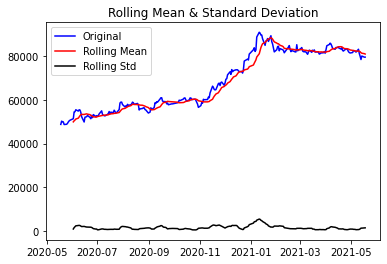

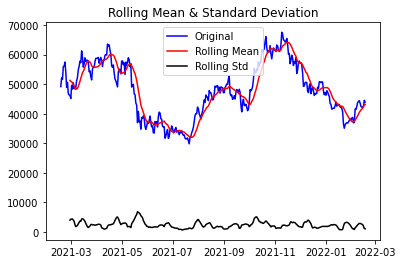

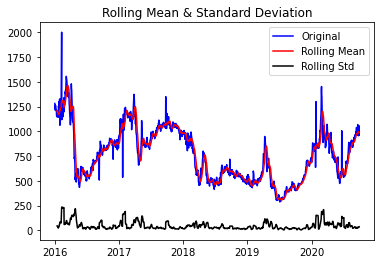

In [17]:
plot_rolling_statistics(ts1, window=12)
plot_rolling_statistics(ts2, window=12)
plot_rolling_statistics(ts3, window=12)

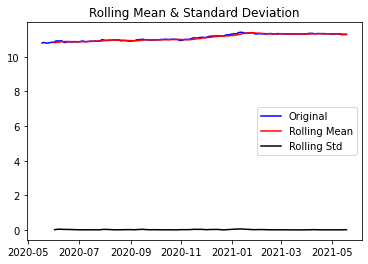

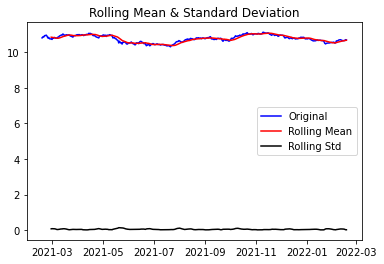

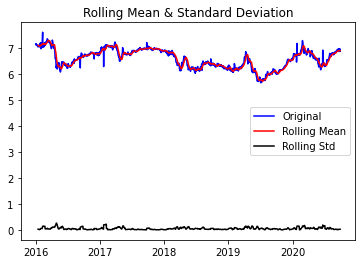

In [18]:
plot_rolling_statistics(ts1_log, window=12)
plot_rolling_statistics(ts2_log, window=12)
plot_rolling_statistics(ts3_log, window=12)

#### 3-2) 정량적 Augmented Dicky-Fuller Test

In [19]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [20]:
augmented_dickey_fuller_test(ts1_log)
augmented_dickey_fuller_test(ts2_log)
augmented_dickey_fuller_test(ts3_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -1.895450
p-value                          0.334205
#Lags Used                       0.000000
Number of Observations Used    365.000000
Critical Value (1%)             -3.448394
Critical Value (5%)             -2.869491
Critical Value (10%)            -2.571006
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   -2.524442
p-value                           0.109640
#Lags Used                        8.000000
Number of Observations Used    1469.000000
Critical Value (1%)              -3.434809
Critical Value (5%)              -2.863510
Critical Value (10%)           

In [21]:
augmented_dickey_fuller_test(ts1)
augmented_dickey_fuller_test(ts2)
augmented_dickey_fuller_test(ts3)

Results of Dickey-Fuller Test:
Test Statistic                  -1.222649
p-value                          0.663778
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -1.900890
p-value                          0.331643
#Lags Used                       0.000000
Number of Observations Used    365.000000
Critical Value (1%)             -3.448394
Critical Value (5%)             -2.869491
Critical Value (10%)            -2.571006
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   -2.633339
p-value                           0.086301
#Lags Used                       10.000000
Number of Observations Used    1467.000000
Critical Value (1%)              -3.434815
Critical Value (5%)              -2.863512
Critical Value (10%)           

p-value를 확인해보면 예상대로 주식, 비트코인은 Stationary를 가진다고 보기는 어려웠고, 그나마 양파가격의 선형모델에서만 0.1 유의수준에서 안정적인 시계열을 가지는 것으로 나타났다. 아마 계절에 따라 가격이 변화하는 특성이 다른 잡다한 변수들보다 강하다고 생각하면 될꺼 같다.

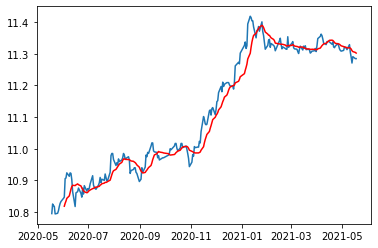

In [22]:
moving_avg = ts1_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts1_log)
plt.plot(moving_avg, color='red')

In [23]:
ts1_log_moving_avg = ts1_log - moving_avg # 변화량 제거
ts1_log_moving_avg.head(15)

Date
2020-05-18         NaN
2020-05-19         NaN
2020-05-20         NaN
2020-05-21         NaN
2020-05-22         NaN
2020-05-25         NaN
2020-05-26         NaN
2020-05-27         NaN
2020-05-28         NaN
2020-05-29         NaN
2020-06-01         NaN
2020-06-02    0.028599
2020-06-03    0.077956
2020-06-04    0.072953
2020-06-05    0.080606
Name: Close, dtype: float64

In [24]:
ts1_log_moving_avg.dropna(inplace=True)
ts1_log_moving_avg.head(15)

Date
2020-06-02    0.028599
2020-06-03    0.077956
2020-06-04    0.072953
2020-06-05    0.080606
2020-06-08    0.061862
2020-06-09    0.061925
2020-06-10    0.049636
2020-06-11    0.021446
2020-06-12   -0.019996
2020-06-15   -0.066141
2020-06-16   -0.025267
2020-06-17   -0.024961
2020-06-18   -0.024494
2020-06-19   -0.010603
2020-06-22   -0.023697
Name: Close, dtype: float64

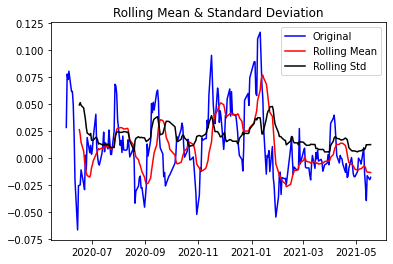

In [25]:
plot_rolling_statistics(ts1_log_moving_avg)

In [26]:
augmented_dickey_fuller_test(ts1_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -4.163469
p-value                          0.000759
#Lags Used                       0.000000
Number of Observations Used    238.000000
Critical Value (1%)             -3.458128
Critical Value (5%)             -2.873762
Critical Value (10%)            -2.573283
dtype: float64


예상외로 주식 1번 데이터는 Trend만 상쇄해줘도 Stationary를 만족하는것으로 보인다. 

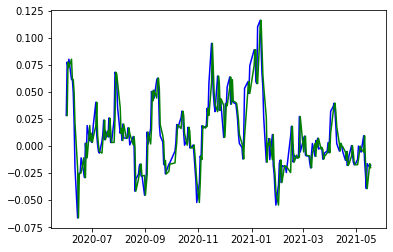

In [27]:
ts1_log_moving_avg_shift = ts1_log_moving_avg.shift()

plt.plot(ts1_log_moving_avg, color='blue')
plt.plot(ts1_log_moving_avg_shift, color='green')

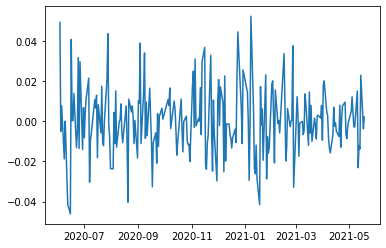

In [28]:
ts1_log_moving_avg_diff = ts1_log_moving_avg - ts1_log_moving_avg_shift
ts1_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts1_log_moving_avg_diff)

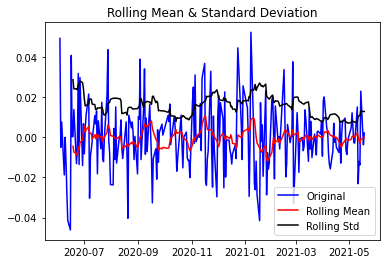

In [29]:
plot_rolling_statistics(ts1_log_moving_avg_diff)

In [30]:
augmented_dickey_fuller_test(ts1_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                -1.546028e+01
p-value                        2.711476e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.370000e+02
Critical Value (1%)           -3.458247e+00
Critical Value (5%)           -2.873814e+00
Critical Value (10%)          -2.573311e+00
dtype: float64


1번데이터는 문제 없을꺼 같다!

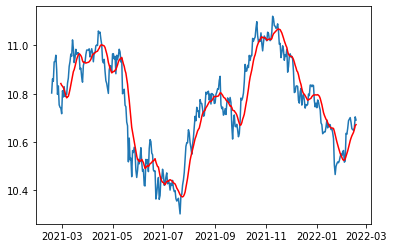

In [31]:
moving_avg = ts2_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts2_log)
plt.plot(moving_avg, color='red')

In [32]:
ts2_log_moving_avg = ts2_log - moving_avg # 변화량 제거
ts2_log_moving_avg.head(15)

Timestamp
2021-02-17         NaN
2021-02-18         NaN
2021-02-19         NaN
2021-02-20         NaN
2021-02-21         NaN
2021-02-22         NaN
2021-02-23         NaN
2021-02-24         NaN
2021-02-25         NaN
2021-02-26         NaN
2021-02-27         NaN
2021-02-28   -0.102317
2021-03-01   -0.117993
2021-03-02   -0.018725
2021-03-03   -0.039073
Name: market-price, dtype: float64

In [33]:
ts2_log_moving_avg.dropna(inplace=True)
ts2_log_moving_avg.head(15)

Timestamp
2021-02-28   -0.102317
2021-03-01   -0.117993
2021-03-02   -0.018725
2021-03-03   -0.039073
2021-03-04    0.012395
2021-03-05   -0.016555
2021-03-06    0.005472
2021-03-07    0.014374
2021-03-08    0.056307
2021-03-09    0.075431
2021-03-10    0.110350
2021-03-11    0.114702
2021-03-12    0.127070
2021-03-13    0.098331
2021-03-14    0.148391
Name: market-price, dtype: float64

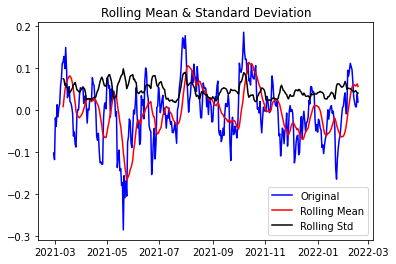

In [34]:
plot_rolling_statistics(ts2_log_moving_avg)

In [35]:
augmented_dickey_fuller_test(ts2_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -5.525947
p-value                          0.000002
#Lags Used                       4.000000
Number of Observations Used    350.000000
Critical Value (1%)             -3.449173
Critical Value (5%)             -2.869833
Critical Value (10%)            -2.571188
dtype: float64


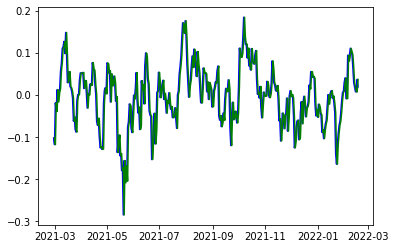

In [36]:
ts2_log_moving_avg_shift = ts2_log_moving_avg.shift()

plt.plot(ts2_log_moving_avg, color='blue')
plt.plot(ts2_log_moving_avg_shift, color='green')

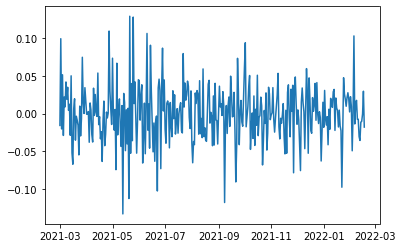

In [37]:
ts2_log_moving_avg_diff = ts2_log_moving_avg - ts2_log_moving_avg_shift
ts2_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts2_log_moving_avg_diff)

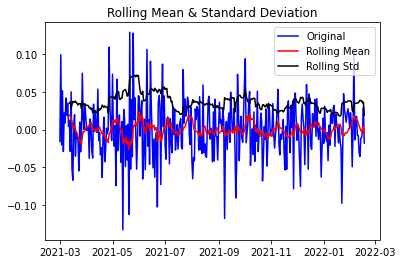

In [38]:
plot_rolling_statistics(ts2_log_moving_avg_diff)

In [39]:
augmented_dickey_fuller_test(ts2_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                -8.321776e+00
p-value                        3.556636e-13
#Lags Used                     1.100000e+01
Number of Observations Used    3.420000e+02
Critical Value (1%)           -3.449616e+00
Critical Value (5%)           -2.870028e+00
Critical Value (10%)          -2.571292e+00
dtype: float64


3번 데이터는 로그값이 로그를 취하기 전보다 더 낮은 p-value를 가졌으므로, 로그를 안 쓴 데이터를 확인해야 할꺼같다.

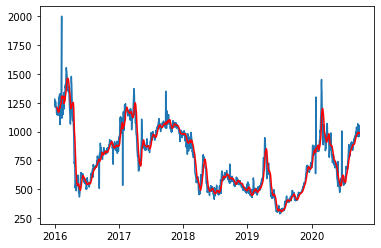

In [40]:
moving_avg = ts3.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts3)
plt.plot(moving_avg, color='red')

In [41]:
ts3_moving_avg = ts3 - moving_avg # 변화량 제거
ts3_moving_avg.head(15)

date
2016-01-02          NaN
2016-01-04          NaN
2016-01-05          NaN
2016-01-06          NaN
2016-01-07          NaN
2016-01-08          NaN
2016-01-09          NaN
2016-01-11          NaN
2016-01-12          NaN
2016-01-13          NaN
2016-01-14          NaN
2016-01-15   -62.083333
2016-01-16   -47.166667
2016-01-18   -16.250000
2016-01-19   -13.166667
Name: 양파_가격(원/kg), dtype: float64

In [42]:
ts3_moving_avg.dropna(inplace=True)
ts3_moving_avg.head(15)

date
2016-01-15    -62.083333
2016-01-16    -47.166667
2016-01-18    -16.250000
2016-01-19    -13.166667
2016-01-20    -12.333333
2016-01-21    -30.166667
2016-01-22      1.750000
2016-01-23     80.166667
2016-01-25     59.583333
2016-01-26    -30.833333
2016-01-27    116.916667
2016-01-28      8.833333
2016-01-29    119.166667
2016-01-30     94.750000
2016-01-31   -145.666667
Name: 양파_가격(원/kg), dtype: float64

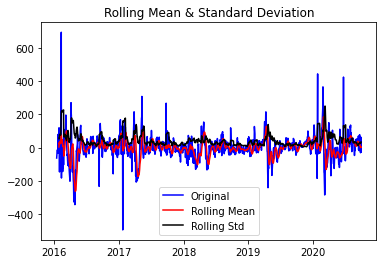

In [43]:
plot_rolling_statistics(ts3_moving_avg)

In [44]:
augmented_dickey_fuller_test(ts3_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                -6.990143e+00
p-value                        7.782971e-10
#Lags Used                     2.100000e+01
Number of Observations Used    1.445000e+03
Critical Value (1%)           -3.434884e+00
Critical Value (5%)           -2.863542e+00
Critical Value (10%)          -2.567836e+00
dtype: float64


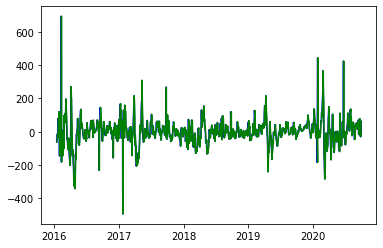

In [45]:
ts3_moving_avg_shift = ts3_moving_avg.shift()

plt.plot(ts3_moving_avg, color='blue')
plt.plot(ts3_moving_avg_shift, color='green')

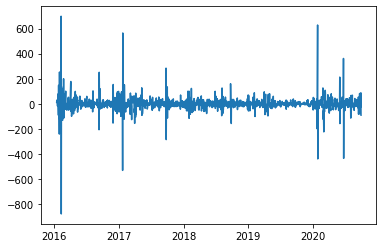

In [46]:
ts3_moving_avg_diff = ts3_moving_avg - ts3_moving_avg_shift
ts3_moving_avg_diff.dropna(inplace=True)
plt.plot(ts3_moving_avg_diff)

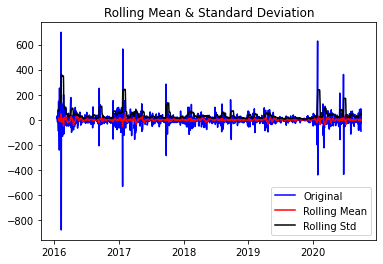

In [47]:
plot_rolling_statistics(ts3_moving_avg_diff)

In [48]:
augmented_dickey_fuller_test(ts3_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                -1.296800e+01
p-value                        3.123983e-24
#Lags Used                     2.400000e+01
Number of Observations Used    1.441000e+03
Critical Value (1%)           -3.434896e+00
Critical Value (5%)           -2.863548e+00
Critical Value (10%)          -2.567839e+00
dtype: float64


1,2 데이터는 로그, 3 데이터는 선형으로 준비 완료!

#### 3-3) 시계열 분해(Time Series Decomposition)
#### 3-4) 잔차 안정성 확인

In [49]:
ts1_log.head()

Date
2020-05-18    10.795486
2020-05-19    10.825760
2020-05-20    10.819778
2020-05-21    10.818778
2020-05-22    10.794460
Name: Close, dtype: float64

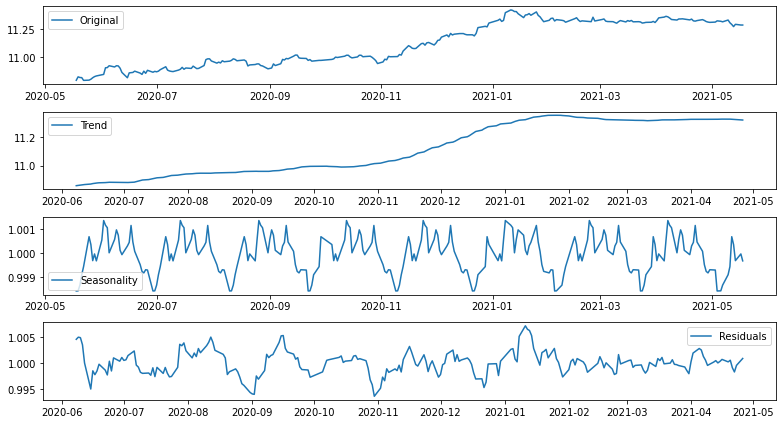

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts1_log, model='multiplicative', period = 30)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts1_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [51]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


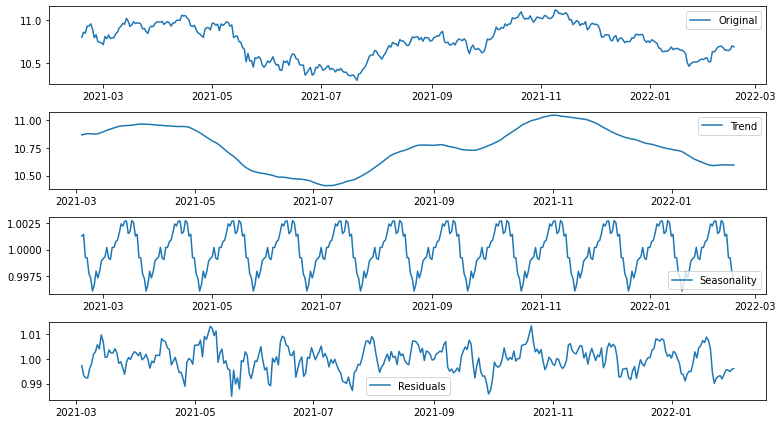

In [52]:
decomposition = seasonal_decompose(ts2_log, model='multiplicative', period = 30)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts2_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [53]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -5.007755
p-value                          0.000021
#Lags Used                      12.000000
Number of Observations Used    323.000000
Critical Value (1%)             -3.450759
Critical Value (5%)             -2.870530
Critical Value (10%)            -2.571560
dtype: float64


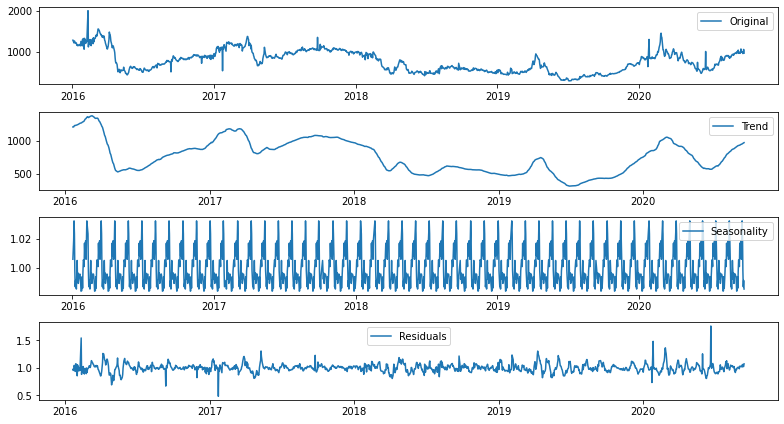

In [54]:
decomposition = seasonal_decompose(ts3, model='multiplicative', period = 30)

trend = decomposition.trend # 추세(시간 추이에 따라 나타나는 평균값 변화 )
seasonal = decomposition.seasonal # 계절성(패턴이 파악되지 않은 주기적 변화)
residual = decomposition.resid # 원본(로그변환한) - 추세 - 계절성

plt.rcParams["figure.figsize"] = (11,6)
plt.subplot(411)
plt.plot(ts3, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [55]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.130930e+01
p-value                        1.250487e-20
#Lags Used                     1.900000e+01
Number of Observations Used    1.428000e+03
Critical Value (1%)           -3.434938e+00
Critical Value (5%)           -2.863566e+00
Critical Value (10%)          -2.567849e+00
dtype: float64


### Step 4) 학습, 테스트 데이터셋 생성

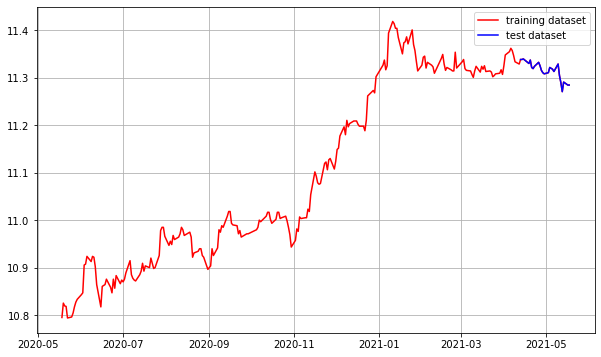

In [56]:
train_data1, test_data1 = ts1_log[:int(len(ts1_log)*0.9)], ts1_log[int(len(ts1_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts1_log, c='r', label='training dataset')
plt.plot(test_data1, c='b', label='test dataset')
plt.legend()

In [57]:
print(ts1_log[:2])
print(train_data1.shape)
print(test_data1.shape)

Date
2020-05-18    10.795486
2020-05-19    10.825760
Name: Close, dtype: float64
(225,)
(25,)


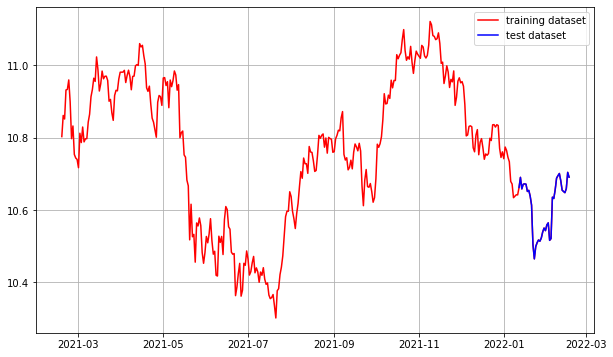

In [58]:
train_data2, test_data2 = ts2_log[:int(len(ts2_log)*0.9)], ts2_log[int(len(ts2_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts2_log, c='r', label='training dataset')
plt.plot(test_data2, c='b', label='test dataset')
plt.legend()

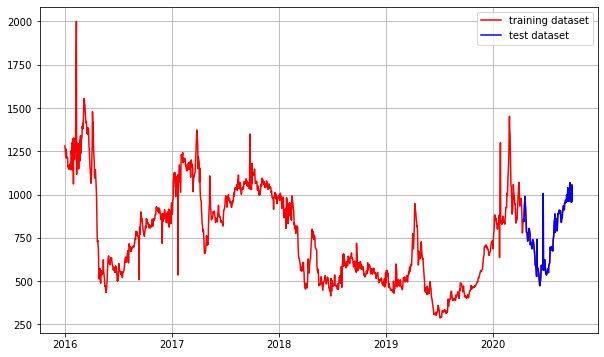

In [59]:
train_data3, test_data3 = ts3[:int(len(ts3)*0.9)], ts3[int(len(ts3)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts3, c='r', label='training dataset')
plt.plot(test_data3, c='b', label='test dataset')
plt.legend()

### STEP 5 : 적정 ARIMA 모수 찾기

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


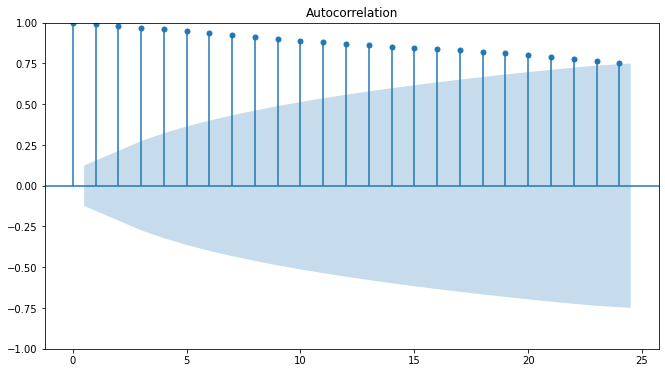

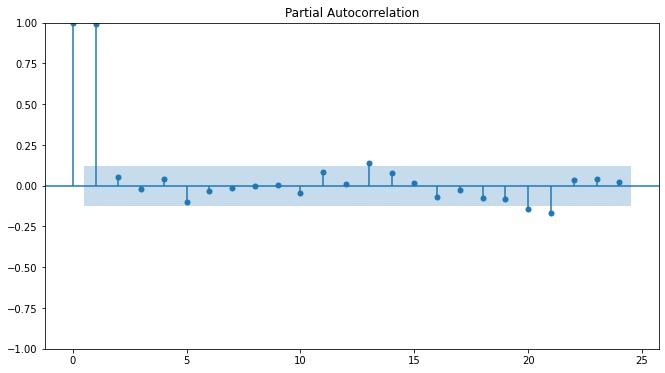

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts1_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts1_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


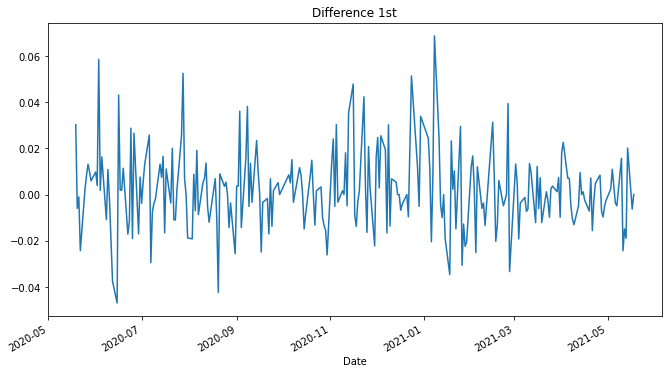

In [61]:
# 1차 차분 구하기
diff_1 = ts1_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.029320e+01
p-value                        3.525823e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


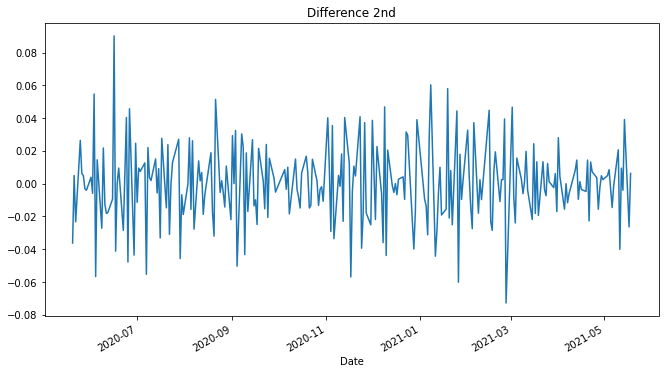

In [62]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

1번 데이터의 경우 p=1, q=0, d=1로 정해도 괜찮을꺼 같다.

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


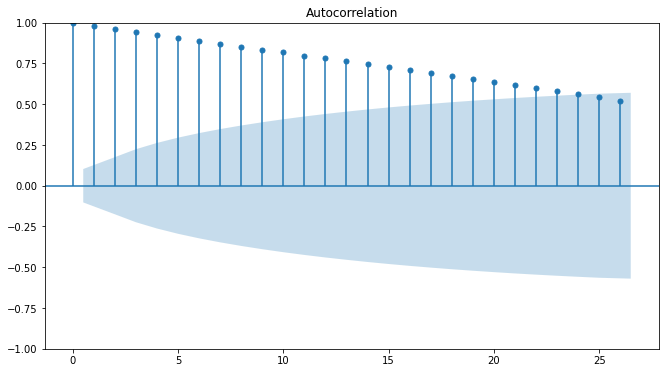

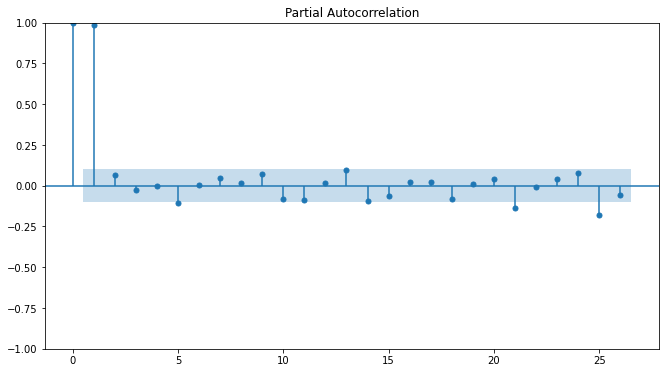

In [63]:
plot_acf(ts2_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts2_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                 -20.425370
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    364.000000
Critical Value (1%)             -3.448443
Critical Value (5%)             -2.869513
Critical Value (10%)            -2.571018
dtype: float64


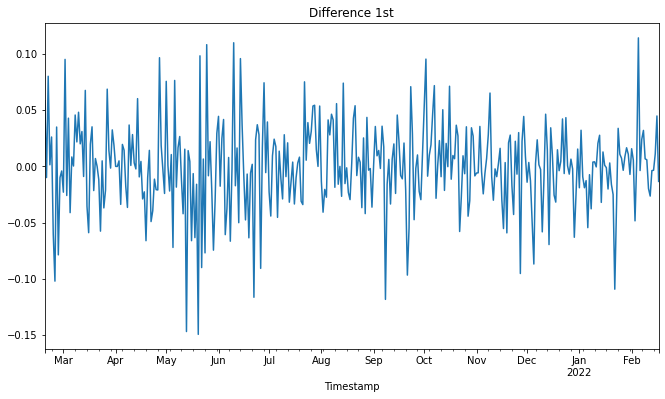

In [64]:
diff_1 = ts2_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -9.225302e+00
p-value                        1.735674e-15
#Lags Used                     1.200000e+01
Number of Observations Used    3.510000e+02
Critical Value (1%)           -3.449119e+00
Critical Value (5%)           -2.869810e+00
Critical Value (10%)          -2.571176e+00
dtype: float64


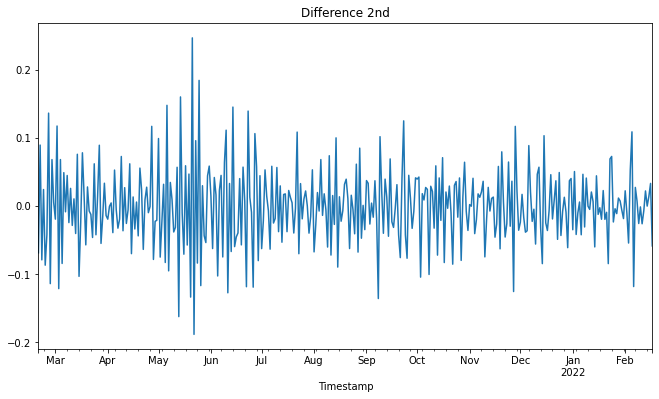

In [65]:
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

2번 데이터의 경우 p=1, q=0, d=2가 더 좋아보인다.

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


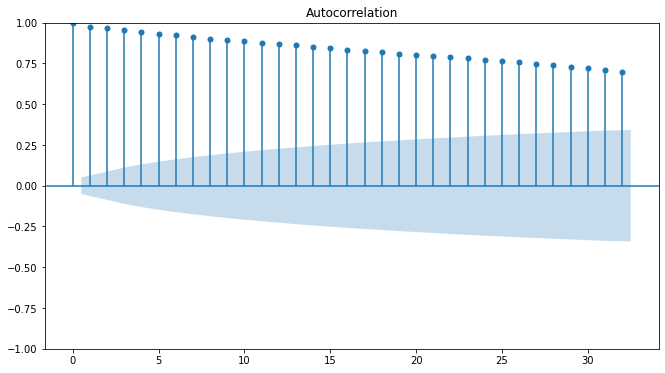

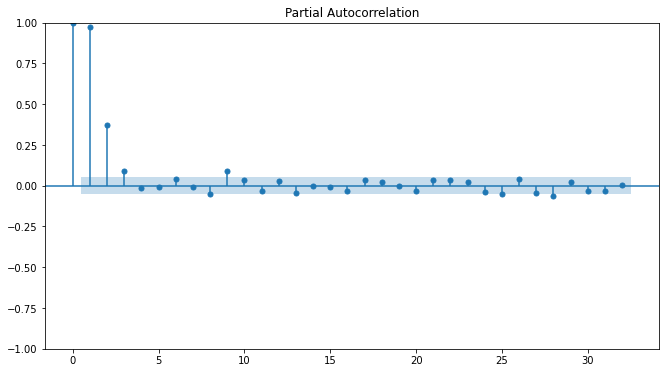

In [66]:
plot_acf(ts3)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts3)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.179979e+01
p-value                        9.390113e-22
#Lags Used                     1.100000e+01
Number of Observations Used    1.465000e+03
Critical Value (1%)           -3.434822e+00
Critical Value (5%)           -2.863515e+00
Critical Value (10%)          -2.567821e+00
dtype: float64


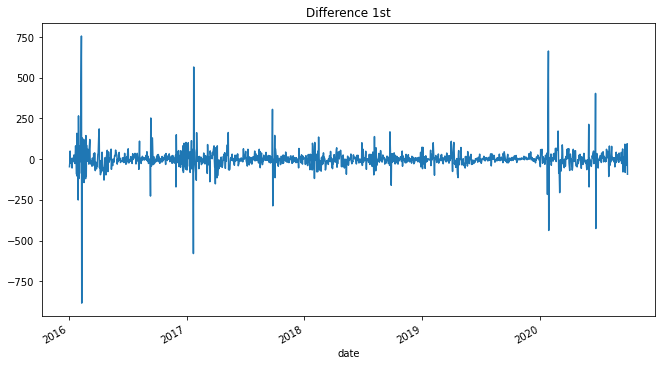

In [67]:
diff_1 = ts3.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.413542e+01
p-value                        2.294649e-26
#Lags Used                     2.400000e+01
Number of Observations Used    1.451000e+03
Critical Value (1%)           -3.434865e+00
Critical Value (5%)           -2.863534e+00
Critical Value (10%)          -2.567832e+00
dtype: float64


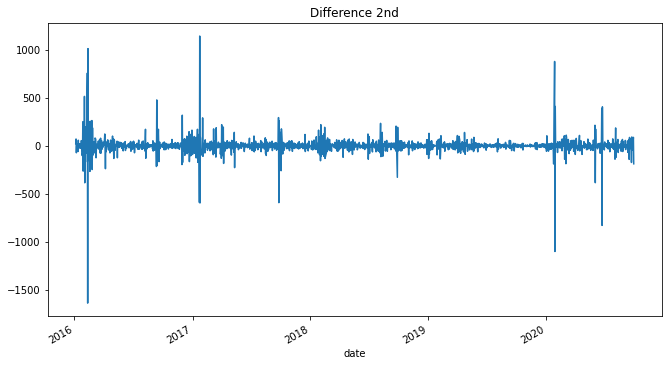

In [68]:
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

3번 데이터의 경우 p=3, q=0, d=1을 사용해도 될꺼같다.

### Step6)  ARIMA 모델 훈련과 테스트

In [76]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data1, order=(1, 0, 1))  # p, d, q
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 583.370
Date:                Thu, 17 Feb 2022   AIC                          -1158.741
Time:                        11:47:39   BIC                          -1145.076
Sample:                             0   HQIC                         -1153.226
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0896      0.127     87.360      0.000      10.841      11.338
ar.L1          0.9942      0.006    157.934      0.000       0.982       1.007
ma.L1          0.0392      0.063      0.623      0.5

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


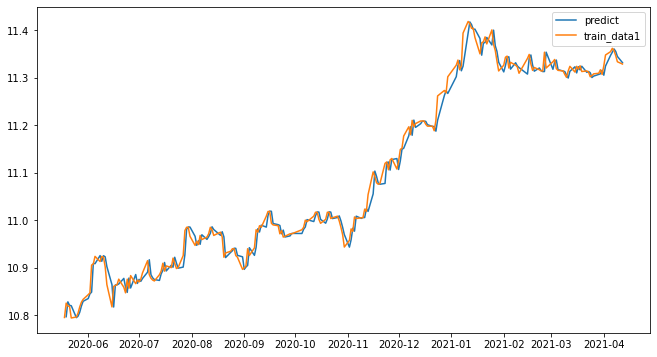

In [77]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data1, label='train_data1')
plt.legend()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given

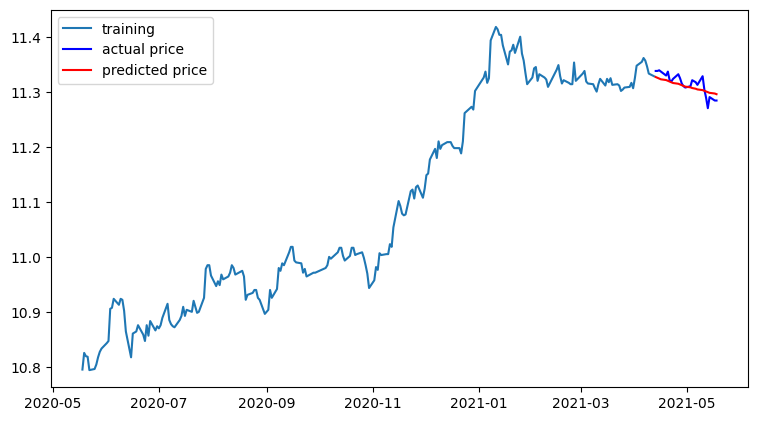

In [82]:
model = ARIMA(train_data1, order=(1, 0, 1))  
fitted_m = model.fit() 

# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data1), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data1.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data1, label='training')
plt.plot(test_data1, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data1), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data1), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data1), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data1))/np.abs(np.exp(test_data1)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1057119.8161340475
MAE:  850.8270312480739
RMSE:  1028.1633217218202
MAPE: 1.04%


### Step7) 다른 종목 예측해 보기

#### 2번 비트코인 데이터

In [84]:
model = ARIMA(train_data2, order=(1, 0, 2))
fitted_m = model.fit() 

print(fitted_m.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:           market-price   No. Observations:                  329
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 593.958
Date:                Thu, 17 Feb 2022   AIC                          -1177.916
Time:                        11:50:47   BIC                          -1158.936
Sample:                    02-17-2021   HQIC                         -1170.344
                         - 01-11-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7633      0.110     97.898      0.000      10.548      10.979
ar.L1          0.9801      0.011     88.727      0.000       0.958       1.002
ma.L1         -0.0758      0.060     -1.266      0.2

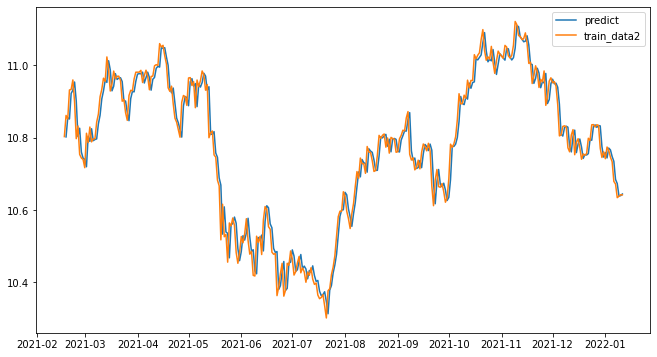

In [85]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data2, label='train_data2')
plt.legend()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


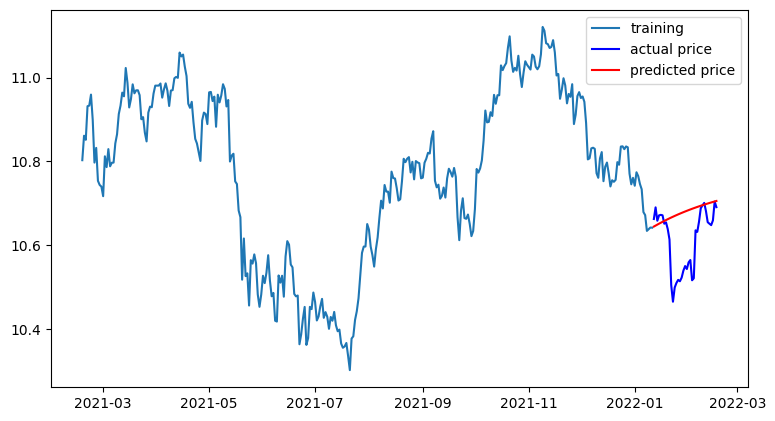

In [87]:
model = ARIMA(train_data2, order=(1, 0, 2))  
fitted_m = model.fit() 

# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data2), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data2.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data2, label='training')
plt.plot(test_data2, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [88]:
mse = mean_squared_error(np.exp(test_data2), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data2), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data2), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data2))/np.abs(np.exp(test_data2)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  15928824.539006948
MAE:  3034.85602186733
RMSE:  3991.0931508807143
MAPE: 7.96%


#### 3번 농산물(양파)가격 데이터

In [89]:
model = ARIMA(train_data3, order=(1, 0, 1))
fitted_m = model.fit() 

print(fitted_m.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:            양파_가격(원/kg)   No. Observations:                 1330
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7245.478
Date:                Thu, 17 Feb 2022   AIC                          14498.957
Time:                        11:57:59   BIC                          14519.728
Sample:                             0   HQIC                         14506.741
                               - 1330                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        765.6247    148.021      5.172      0.000     475.509    1055.740
ar.L1          0.9924      0.004    243.910      0.000       0.984       1.000
ma.L1         -0.3886      0.009    -41.755      0.0

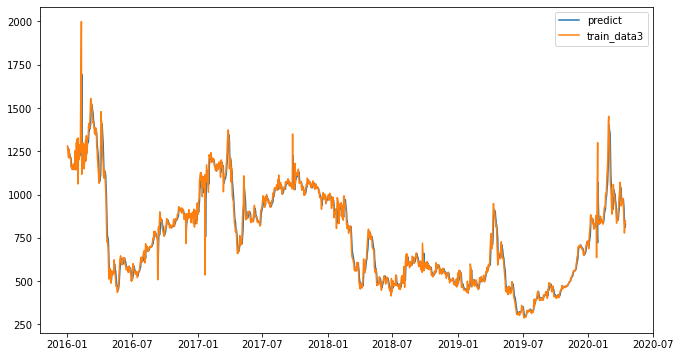

In [90]:
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data3, label='train_data3')
plt.legend()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given

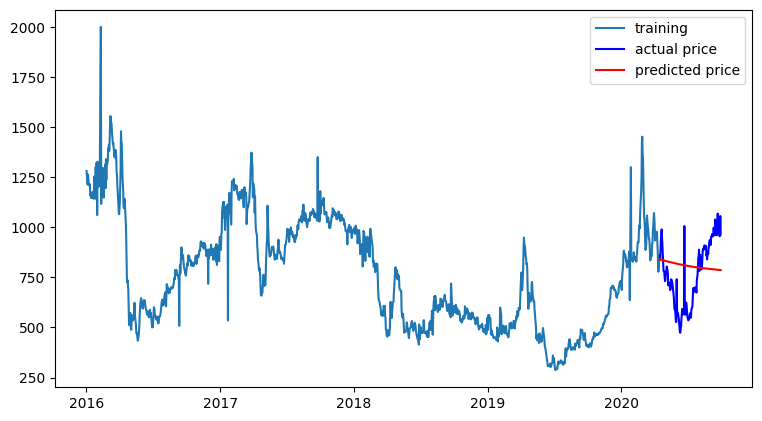

In [103]:
model = ARIMA(train_data3, order=(3, 0, 1))  
fitted_m = model.fit() 

# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data3), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data3.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data3, label='training')
plt.plot(test_data3, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [104]:
mse = mean_squared_error(test_data3, fc)
print('MSE: ', mse)

mae = mean_absolute_error(test_data3, fc)
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(test_data3, fc))
print('RMSE: ', rmse)

mape = np.mean(np.abs(fc - test_data3)/np.abs(test_data3))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  30349.459486795375
MAE:  152.7779527506318
RMSE:  174.2109625907491
MAPE: 22.49%


1번 주식 데이터의 경우 경향성만 맞추었고,
2번 비트코인 데이터의 경우 전반적으로 틀렸지만, 신기하게 결과값은 수렴하는 모습을 보였다.
3번 양파가격 데이터는 큰 편차의 탓인가 평균값만 맞추는 것을 볼 수 있었다. 

어떻게 잔차를 빼주는 방식으로 대부분의 변수를 제거하여 시계열의 따른 변화를 찾아내긴 했지만
변수의 종류도 너무나 많고, 변수의 영향력이 시간의 영향력보다 큰 경우가 많아서인가
적절한 예측은 하지 못했다고 할 수 있다.

신기하게도 3번 야채가격의 경우 데이터도 많은데 로그모델보다 선형모델이 더 적합했으나
실제로 마지막의 오차를 확인했을때 다른값들에 비해 큰 차이를 가지는 것을 볼 수 있었다.

주식이나 야채값들 모두 월마다 데이터가 있는것이 아니고 일마다 데이터가 있어서 일주일단위로 trend가 변화하므로
그걸 좀 반영했으면 결과가 더 좋게나오지 않았을까 싶긴하지만, 역시 통제되지않는 변수가 너무 많아서
주식이나 비트코인을 예측해서 떼부자가 되긴 어렵지 않을까 생각이 들었다.

주식예측은 단순 회귀모델보다는 좀 게임이론이라던가 정보이론에 의거해서 모델을 짜보면 어떨까 하는 생각이 들었다.